# CSUREMM 2025 Project
### Topic: Using Cryptocurrency Volatility to Predict Labor Participation Rate and Macroeconomic Change in US

#### Tianyi, Annie, Alice
#### Updated June 5, 2025
deleted USD, regenerate mastersheet w monthly data

### 0.Background of study

fill in research later

### Methodology visualized:

citation: https://onlinelibrary.wiley.com/doi/full/10.1002/for.2930

# 0. Data Testing
## 0.1 Linear AutoRegression of Labor Participation on Tether, Bitcoin, USD (Monthly, 2017-9 to 2025-1)

In [20]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [21]:
# Load data
df = pd.read_excel('data/Monthly Mastersheet.xlsx')  # Must contain: 'Month', 'Tether-EUR LogVol', 'Labor data'

# Ensure date is datetime and set index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

### Tether

In [22]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Tether'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['Labor data']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Labor data   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     7.213
Date:                Thu, 05 Jun 2025   Prob (F-statistic):            0.00869
Time:                        11:55:15   Log-Likelihood:                -77.626
No. Observations:                  88   AIC:                             159.3
Df Residuals:                      86   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            63.1243      0.270    233.839

### Bitcoin

In [23]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Bitcoin'].shift(1)
# Drop NA (first row will be NaN due to lag)

df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['Labor data']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Labor data   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6342
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.428
Time:                        11:55:15   Log-Likelihood:                -80.315
No. Observations:                  87   AIC:                             164.6
Df Residuals:                      85   BIC:                             169.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            62.1865      0.296    210.268

## 0.2 Linear Regression of Inflation on VOL 
updated May 30th

### Tether

In [24]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Tether'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['Inflation Rate (CPI)']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Inflation Rate (CPI)   R-squared:                       0.525
Model:                              OLS   Adj. R-squared:                  0.519
Method:                   Least Squares   F-statistic:                     92.79
Date:                  Thu, 05 Jun 2025   Prob (F-statistic):           3.17e-15
Time:                          11:55:15   Log-Likelihood:                -363.44
No. Observations:                    86   AIC:                             730.9
Df Residuals:                        84   BIC:                             735.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           205.3442  

### Bitcoin

In [25]:
# Create lagged log volatility as predictor
df['Lagged_LogVol'] = df['Bitcoin'].shift(1)

# Drop NA (first row will be NaN due to lag)
df = df.iloc[1:]

X = df['Lagged_LogVol']
y = df['Inflation Rate (CPI)']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Inflation Rate (CPI)   R-squared:                       0.145
Model:                              OLS   Adj. R-squared:                  0.135
Method:                   Least Squares   F-statistic:                     14.07
Date:                  Thu, 05 Jun 2025   Prob (F-statistic):           0.000325
Time:                          11:55:15   Log-Likelihood:                -383.87
No. Observations:                    85   AIC:                             771.7
Df Residuals:                        83   BIC:                             776.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           238.9598  

# Plotting

['Labor data', 'Bitcoin', 'Tether', 'Inflation Rate (CPI)', 'Money Supply', 'Interest Rate', 'VIX', 'MOVE', 'Unnamed: 9', 'Lagged_LogVol']


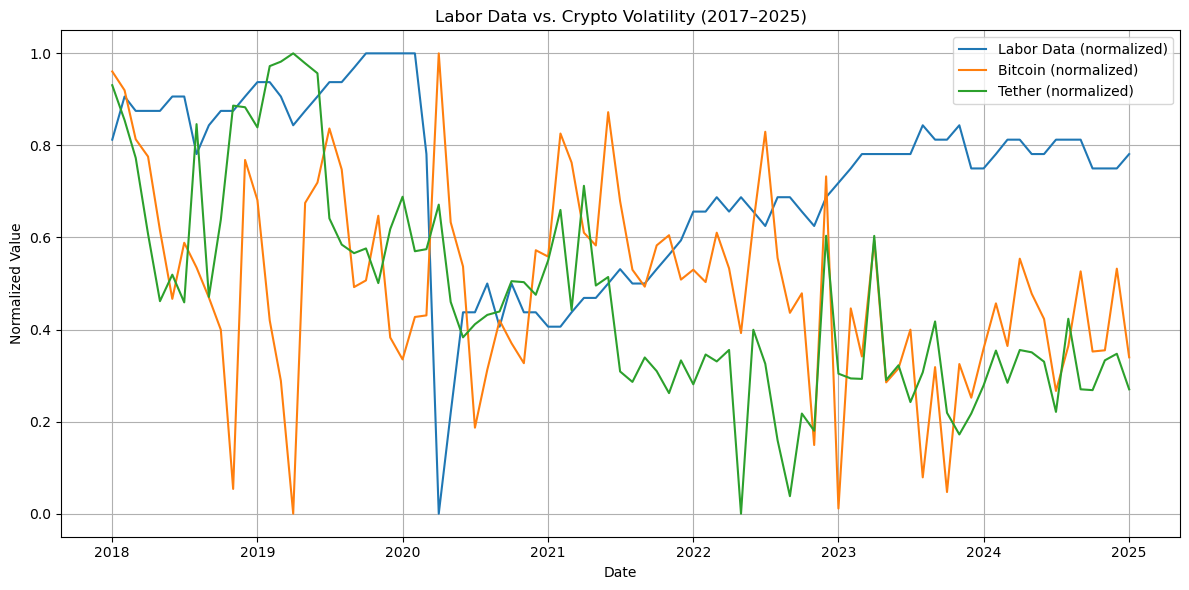

In [26]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Labor data', 'Bitcoin', 'Tether']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)


# Plot
plt.plot(df_normalized.index, df_normalized['Labor data'], label='Labor Data (normalized)')
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')

plt.title('Labor Data vs. Crypto Volatility (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Plotting with new macros

In [ ]:
print(df.columns.tolist())

# Plot all four columns on the same graph
plt.figure(figsize=(12, 6))

# Normalize each series for comparison (optional but recommended)
df_normalized = df[['Labor data', 'Bitcoin', 'Tether','Inflation Rate (CPI)','Money Supply','Interest Rate','VIX','MOVE']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot
plt.plot(df_normalized.index, df_normalized['Labor data'], label='Labor Data (normalized)')
plt.plot(df_normalized.index, df_normalized['Bitcoin'], label='Bitcoin (normalized)')
plt.plot(df_normalized.index, df_normalized['Tether'], label='Tether (normalized)')
plt.plot(df_normalized.index, df_normalized['Inflation Rate (CPI)'], label='Inflation Rate (normalized)')
plt.plot(df_normalized.index, df_normalized['Money Supply'], label='Money Supply (normalized)')
plt.plot(df_normalized.index, df_normalized['Interest Rate'], label='Interest Rate (normalized)')
plt.plot(df_normalized.index, df_normalized['VIX'], label='VIX')
plt.plot(df_normalized.index, df_normalized['VIX'], label='MOVE')

plt.title('Labor Data vs. Crypto Volatility & USD (2017–2025)')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

['Labor data', 'Bitcoin', 'Tether', 'Inflation Rate (CPI)', 'Money Supply', 'Interest Rate', 'VIX', 'MOVE', 'Unnamed: 9', 'Lagged_LogVol']


KeyError: "['USD'] not in index"

<Figure size 1200x600 with 0 Axes>

# 1. Descriptive Statistics
need to change var names (repeated df if add code after this)

In [ ]:
#bitcoinrealvol
# Load the CSV file
from scipy.stats import skew, kurtosis
import pandas as pd
file_path = "data/bitcoinrealvol.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

import pandas as pd
from scipy.stats import skew, kurtosis
#bitcoinlogvol
# Load the CSV file
file_path = "data/bitcoinlogvol.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

import pandas as pd
from scipy.stats import skew, kurtosis

#tetherrealvol
# Load the CSV file
file_path = "data/Tether - real.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

#tetherlogvol
# Load the CSV file
file_path = "data/Tether - log.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}

# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

#USDrealvol
# Load the CSV file
file_path = "data/USD - real.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}
# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

#USDlogvol
file_path = "data/USD - log.csv"
df = pd.read_csv(file_path, header=None)

df.columns = ['Realized_Volatility']

# Remove any non-numeric values and convert to float
df = df[pd.to_numeric(df['Realized_Volatility'], errors='coerce').notnull()]
df['Realized_Volatility'] = df['Realized_Volatility'].astype(float)

# Calculate statistics
summary = {
    'Mean': df['Realized_Volatility'].mean(),
    'Median': df['Realized_Volatility'].median(),
    'Max': df['Realized_Volatility'].max(),
    'Min': df['Realized_Volatility'].min(),
    'Standard Deviation': df['Realized_Volatility'].std(),
    'Skewness': skew(df['Realized_Volatility']),
    'Kurtosis': kurtosis(df['Realized_Volatility'])
}
# Convert results to a DataFrame and print
summary_df = pd.DataFrame([summary])
print(summary_df)

       Mean    Median       Max       Min  Standard Deviation  Skewness  \
0  0.036756  0.026261  0.204831  0.001694            0.031564  2.097337   

   Kurtosis  
0  5.757715  
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurtosis
0 -1.813229   -1.82 -0.79 -3.19            0.419135 -0.334903  0.270325
       Mean    Median       Max       Min  Standard Deviation  Skewness  \
0  0.000987  0.000412  0.011461  0.000076            0.001666  3.592852   

    Kurtosis  
0  14.362637  
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurtosis
0 -3.784958    -3.9 -2.23 -4.74            0.491597   1.08904  0.874666
       Mean    Median      Max       Min  Standard Deviation  Skewness  \
0  0.000415  0.000341  0.00206  0.000059            0.000304  2.479719   

   Kurtosis  
0  7.721799  
       Mean  Median   Max   Min  Standard Deviation  Skewness  Kurtosis
0 -3.991892   -3.99 -3.09 -4.87            0.303919  0.253363  0.310582
